<a href="https://colab.research.google.com/github/inki53/python-deep-learning/blob/master/05_redes_neuronales_en_keras%20mnist%20y%20fashion%20mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 05. Redes neuronales en Keras
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


## 5.1. Precarga de los datos en Keras

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


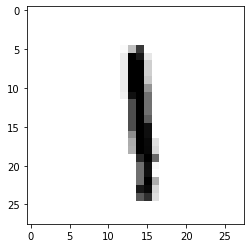

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [ ]:
print(y_train[8])

1


In [ ]:
print(x_train.ndim)

3


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train.dtype) 

uint8


In [ ]:
my_slice = x_train [1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [ ]:
my_slice = x_train [1:100,0:28, 0:28]
print(my_slice.shape)

(99, 28, 28)


In [ ]:
my_slice = x_train [:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [ ]:
my_slice = x_train [:, 7:-7, 7:-7]
print(my_slice.shape)


(60000, 14, 14)


## 5.2. Preprocesado de datos de entrada en una red neuronal

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)

(10000, 10)


## 5.3. Definición del modelo

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## 5.4. Configuración del proceso de aprendizaje

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## 5.5. Entrenamiento del modelo

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 1.9384 - accuracy: 0.4946
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3440 - accuracy: 0.6937
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9849 - accuracy: 0.7948
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7799 - accuracy: 0.8373
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6605 - accuracy: 0.8557


## 5.6. Evaluación del modelo

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6061 - accuracy: 0.8691


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8690999746322632


In [ ]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step


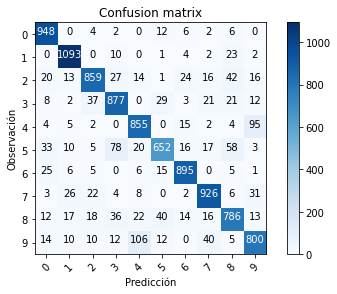

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## 5.7. Generación de predicciones

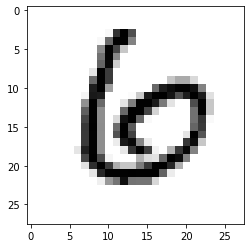

In [ ]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(predictions[11])

6

In [ ]:
print(predictions[11])

[0.08871808 0.03533775 0.14763168 0.0292788  0.05417016 0.0893229
 0.46790007 0.00275134 0.07861366 0.00627557]


In [ ]:
np.sum(predictions[11])

0.99999994

## 5.8. Datos Fashion-MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

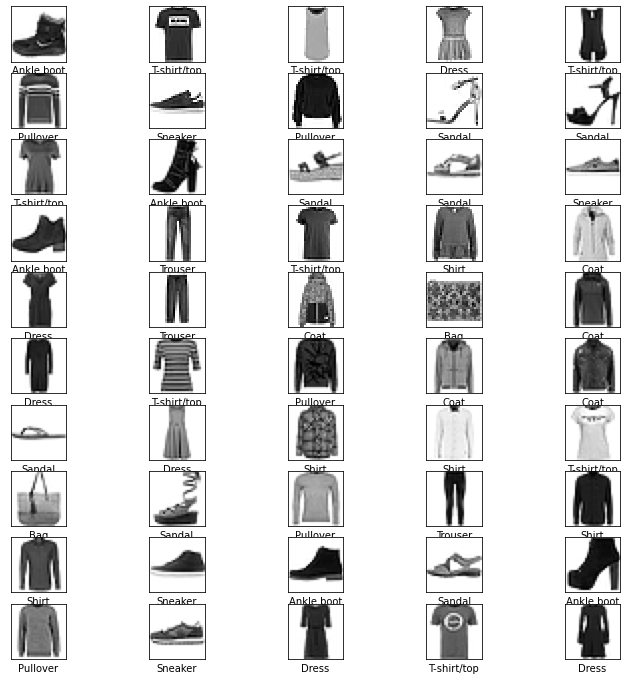

In [ ]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8661 - accuracy: 0.4570
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2835 - accuracy: 0.6596
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0437 - accuracy: 0.6969
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9069 - accuracy: 0.7306
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8157 - accuracy: 0.7581


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7942 - accuracy: 0.7565


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.7466


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[5]

array([6.2438581e-02, 8.5026759e-01, 2.6973209e-03, 5.6188922e-02,
       9.0023307e-03, 5.9085111e-03, 1.0635254e-02, 9.6261315e-04,
       1.1093498e-03, 7.8951253e-04], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

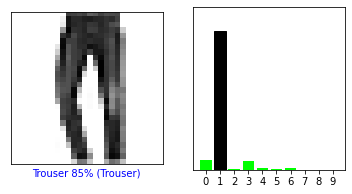

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

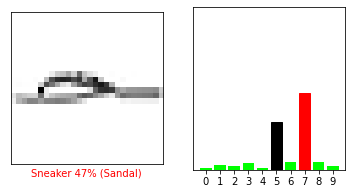

In [ ]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

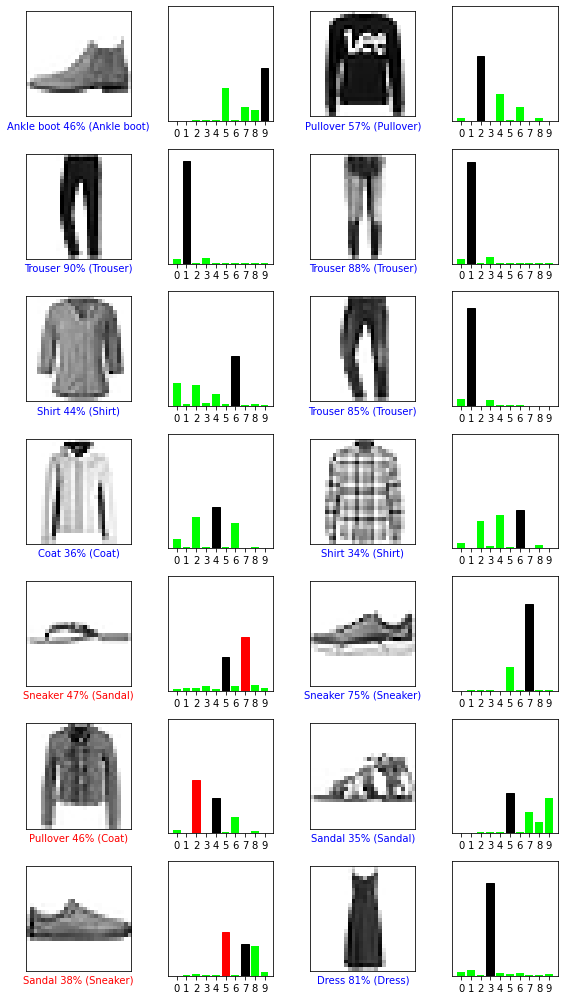

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1076 - accuracy: 0.7349
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5917 - accuracy: 0.8247
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8395
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4553 - accuracy: 0.8476
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.8409

Test accuracy: 0.8409000039100647


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


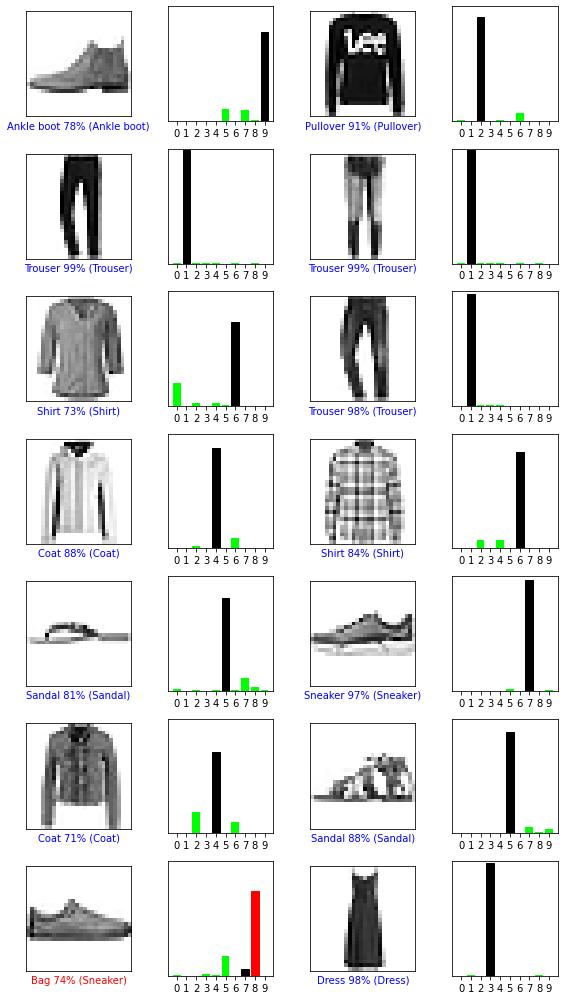

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
